In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [14]:

img = cv2.imread(r'blueberry_segmentation-2\test\15-003_F2_18_21_jpg.rf.f289777165752d81a83fec82fdb8d2bc.jpg')

img_xyz = cv2.cvtColor(cv2.cvtColor(img,cv2.COLOR_BGR2RGB), cv2.COLOR_RGB2XYZ)

# equalize the histogram of the Y channel
img_xyz[:,:,0] = cv2.equalizeHist(img_xyz[:,:,0])

# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_xyz, cv2.COLOR_YUV2RGB)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


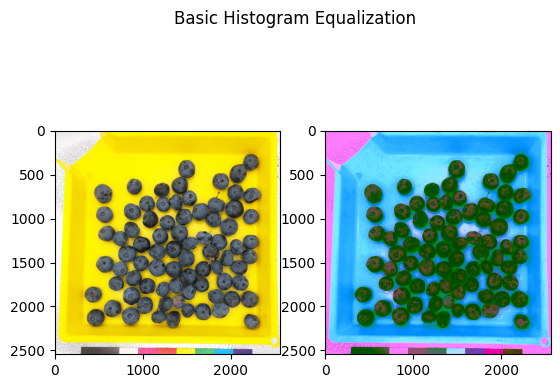

In [15]:
fig, ax = plt.subplots(1,2)
fig.suptitle('Basic Histogram Equalization')
ax[0].imshow(img)
ax[1].imshow(img_output)


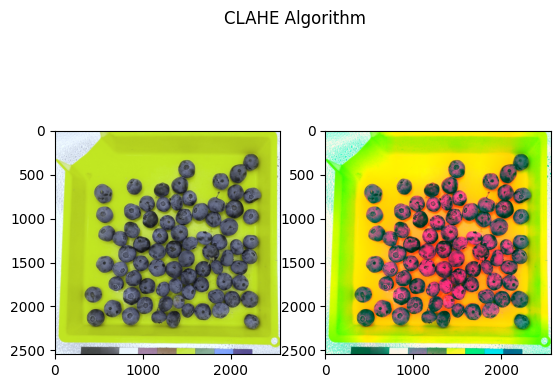

In [21]:
img_lab = cv2.cvtColor(img, cv2.COLOR_RGB2XYZ)

L,a,b = cv2.split(img_lab)
clahe = cv2.createCLAHE(clipLimit=2.0)
eq_L = clahe.apply(L)

img_output1 = cv2.cvtColor(cv2.merge([eq_L, a, b]), cv2.COLOR_XYZ2RGB)

fig1, ax1 = plt.subplots(1,2)
fig1.suptitle("CLAHE Algorithm")
ax1[0].imshow(img_lab)
ax1[1].imshow(img_output1)

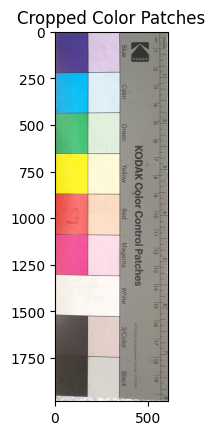

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
file_path = r"C:\Users\sasan\Downloads\NC5302_F2_14_8.jpg"
image = cv2.imread(file_path)

# Convert to grayscale for thresholding
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Since the color patches are on the right side of the image, we focus on that area
# We will define the region of interest (ROI) as the rightmost 20% of the image
height, width, _ = image.shape
roi_x_start = int(width * 0.8)
roi = gray[:, roi_x_start:width]

# Re-apply thresholding to the ROI
_, binary_roi = cv2.threshold(roi, 150, 255, cv2.THRESH_BINARY_INV)

# Find contours in the ROI
contours_roi, _ = cv2.findContours(binary_roi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours by area and take the largest one, assuming it's the patch area
sorted_contours = sorted(contours_roi, key=cv2.contourArea, reverse=True)
patch_contour = sorted_contours[0]

# Get the bounding box of the largest contour
x, y, w, h = cv2.boundingRect(patch_contour)
x += roi_x_start  # Adjust x coordinate relative to the full image

# Crop the color patch area from the original image
color_patches_img = cv2.cvtColor(image[y:y+h, x:x+w], cv2.COLOR_BGR2RGB)

# Show the cropped color patches
plt.imshow(color_patches_img)
plt.title('Cropped Color Patches')
plt.show()


(3120, 4160, 3) (340, 1906, 3)


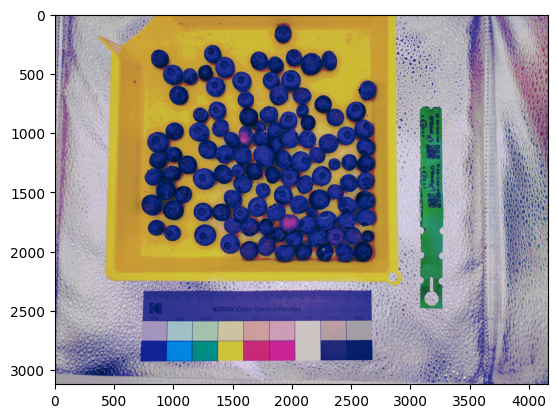

In [3]:
from skimage import exposure
import matplotlib.pyplot as plt
import cv2

source = cv2.cvtColor(cv2.imread(r"C:\Users\sasan\Downloads\H1-O_Neal_E3_7_43-48C.jpg"),cv2.COLOR_BGR2RGB)

target = cv2.cvtColor(cv2.imread(r"C:\Users\sasan\Downloads\color_patches.jpg"),cv2.COLOR_BGR2RGB)
print(source.shape,target.shape)
# Transfer color_patches_img distribution to test_img
matched = exposure.match_histograms(source,target,channel_axis=2)
plt.imshow(matched)

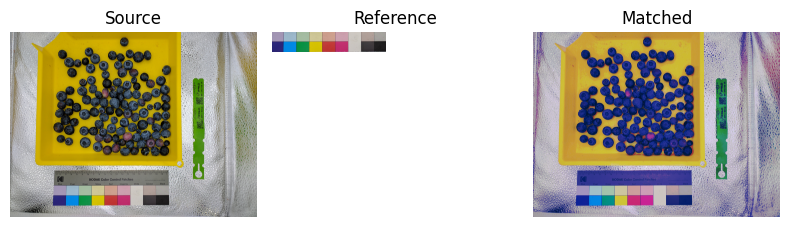

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(source)
ax1.set_title('Source')
ax2.imshow(target)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

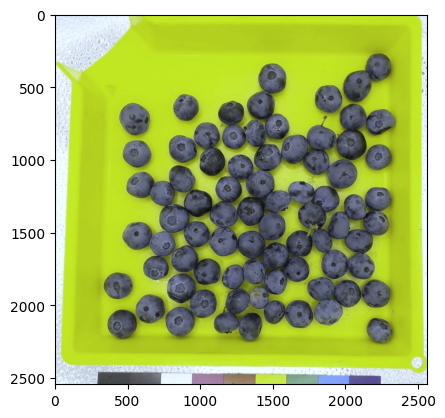

In [16]:
img = cv2.cvtColor(cv2.imread(r'blueberry_segmentation-2\test\15-003_F2_18_21_jpg.rf.f289777165752d81a83fec82fdb8d2bc.jpg'),cv2.COLOR_BGR2RGB)

img_lab = cv2.cvtColor(img, cv2.COLOR_RGB2XYZ)

plt.imshow(img_lab)

In [19]:
import skimage
white_kodak = skimage.color.lab2rgb([[53.31,63.98,36.87 ],[55.92,-54.49,32.14],[46.11,17.02,-26.83]]) #RGB
white_kodak

array([[232.35837464,  64.22476854,  68.03013305],
       [  0.        , 155.16486645,  74.79661297],
       [114.51415178, 101.46954076, 154.19544375]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


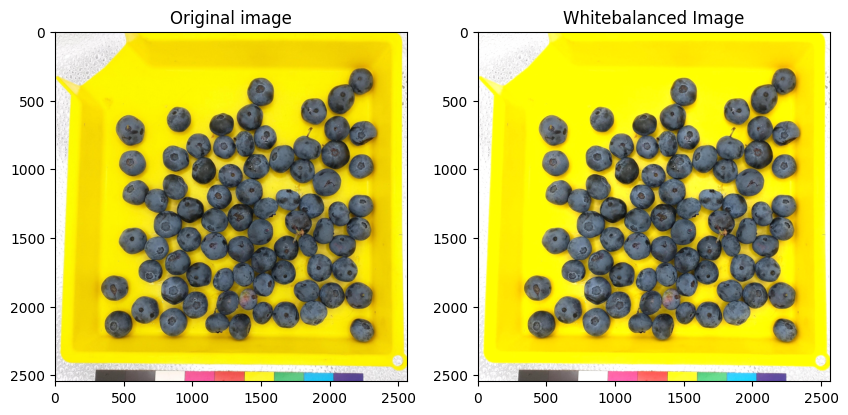

In [41]:
def whitepatch_balancing(image, ref_img_white):
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    ax[0].imshow(image)
    # ax[0].add_patch(Rectangle((from_column, from_row),
    #                           column_width,
    #                           row_width,
    #                           linewidth=3,
    #                           edgecolor='r', facecolor='none'));
    ax[0].set_title('Original image')
    image_max = (image*1.0 /
                 ref_img_white.max(axis=(0, 1))) #.clip(0, 1)
    ax[1].imshow(image_max)

    ax[1].set_title('Whitebalanced Image')
whitepatch_balancing(cv2.normalize(img, None, 0, 1.0,
cv2.NORM_MINMAX, dtype=cv2.CV_32F), white_kodak)

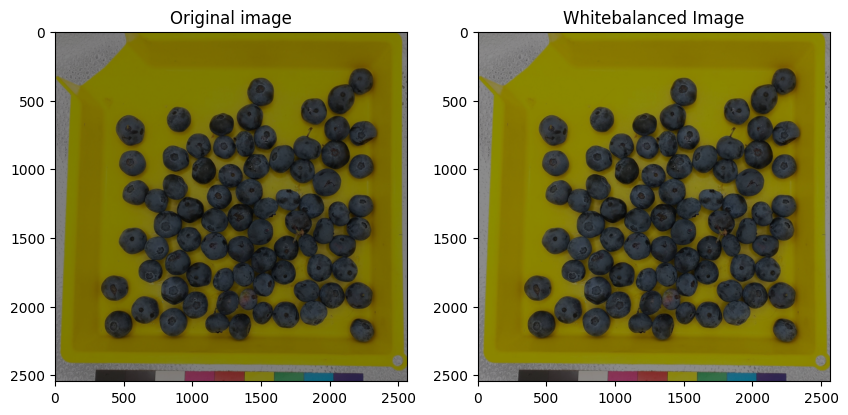

In [52]:
from PIL import Image,ImageEnhance

image = Image.open(r'blueberry_segmentation-2\test\15-003_F2_18_21_jpg.rf.f289777165752d81a83fec82fdb8d2bc.jpg').convert('RGB')
img_enhancer = ImageEnhance.Brightness(image)
factor = 0.5
enhanced_output = np.array(img_enhancer.enhance(factor))
whitepatch_balancing(enhanced_output/255.0, white_kodak)

In [50]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(img)
# ax[0].add_patch(Rectangle((from_column, from_row),
#                           column_width,
#                           row_width,
#                           linewidth=3,
#                           edgecolor='r', facecolor='none'));
ax[0].set_title('Original image')
image_max = enhanced_output
ax[1].imshow(image_max)

ax[1].set_title('Whitebalanced Image')

array([[[0.07843137, 0.07843137, 0.07843137],
        [0.08235294, 0.08235294, 0.07843137],
        [0.08235294, 0.08235294, 0.08235294],
        ...,
        [0.08627451, 0.08627451, 0.08627451],
        [0.08627451, 0.08627451, 0.08627451],
        [0.08235294, 0.08235294, 0.08235294]],

       [[0.07843137, 0.07843137, 0.07843137],
        [0.08235294, 0.08235294, 0.08235294],
        [0.08235294, 0.08235294, 0.08235294],
        ...,
        [0.08627451, 0.08627451, 0.08627451],
        [0.08627451, 0.08627451, 0.08627451],
        [0.08235294, 0.08235294, 0.08235294]],

       [[0.08235294, 0.08235294, 0.08235294],
        [0.08235294, 0.08235294, 0.08235294],
        [0.08235294, 0.08235294, 0.08235294],
        ...,
        [0.08627451, 0.08627451, 0.08627451],
        [0.08627451, 0.08627451, 0.08627451],
        [0.08627451, 0.08627451, 0.08627451]],

       ...,

       [[0.07843137, 0.07843137, 0.07843137],
        [0.08235294, 0.08235294, 0.08235294],
        [0.08627451, 0

In [49]:
enhanced_output/255

array([[[0.07843137, 0.07843137, 0.07843137],
        [0.08235294, 0.08235294, 0.07843137],
        [0.08235294, 0.08235294, 0.08235294],
        ...,
        [0.08627451, 0.08627451, 0.08627451],
        [0.08627451, 0.08627451, 0.08627451],
        [0.08235294, 0.08235294, 0.08235294]],

       [[0.07843137, 0.07843137, 0.07843137],
        [0.08235294, 0.08235294, 0.08235294],
        [0.08235294, 0.08235294, 0.08235294],
        ...,
        [0.08627451, 0.08627451, 0.08627451],
        [0.08627451, 0.08627451, 0.08627451],
        [0.08235294, 0.08235294, 0.08235294]],

       [[0.08235294, 0.08235294, 0.08235294],
        [0.08235294, 0.08235294, 0.08235294],
        [0.08235294, 0.08235294, 0.08235294],
        ...,
        [0.08627451, 0.08627451, 0.08627451],
        [0.08627451, 0.08627451, 0.08627451],
        [0.08627451, 0.08627451, 0.08627451]],

       ...,

       [[0.07843137, 0.07843137, 0.07843137],
        [0.08235294, 0.08235294, 0.08235294],
        [0.08627451, 0